In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import random


data_path = '../bbbc021/singlecell/singh_cp_pipeline_singlecell_images'
dapi_name = 'Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3-DBD0C40B78DB.tif'
actin_name = 'Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA-361CA0A7DC88.tif'
tubulin_name = 'Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5-E2235A93A3CC.tif'

In [3]:
metadata = pd.read_csv('../bbbc021/singlecell/metadata.csv')

In [45]:
get_dapi_at = lambda  idx: os.path.join(data_path,
    metadata.iloc(0)[idx]['Image_FileName_DAPI'][:-4],
    metadata.iloc(0)[idx]['Image_FileName_DAPI'][:-4]+'_{idx}.npy').format(idx=metadata.iloc(0)[idx]['ImageNumber'])
get_moa_at = lambda  idx: metadata.iloc(0)[idx]['moa']


10000
10001
10002
10003
10004
10005
10006
10007
10008


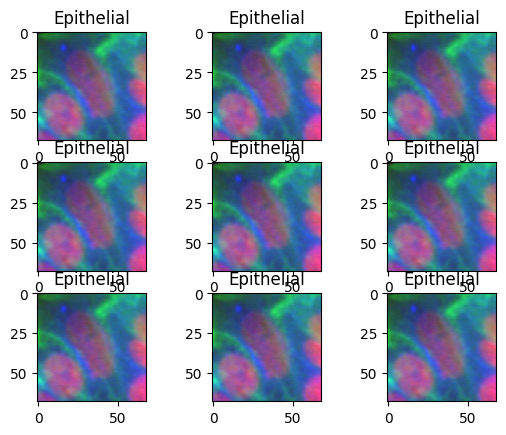

In [48]:
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        idx = 10000+i*3+j
        print(idx)
        x = np.load(get_dapi_at(idx))
        moa = get_moa_at(idx)
        axs[i, j].imshow(x/x.max(axis=(0,1)))
        axs[i, j].title.set_text(moa)


plt.show()

In [49]:
vec = np.array([0.044361472,-0.10677618,-0.06382878,-0.26618272,0.025728818,-0.043396045,0.14795929,0.115737244,-0.068635486,0.034701418,-0.036691997,-0.04336162,0.07169748,0.08388449,0.083172105,0.08004857,0.0024439953,0.3383478,-0.06846927,-0.109311424,-0.6344309,-1.0007111,-0.122526646,-0.6517526,-1.067812,-0.7211963,0.0029647741,0.5236863,0.70656323,-0.56679994,-0.060206667,0.99043405,1.0884792,-0.078106694,0.1304279,-0.06273112,0.07536333,-0.16993316,0.045326166,0.08364512,-1.7302927,-1.2690372,-0.6255956,0.07980296,-0.01352033,-0.0054545067,0.026914299,-0.63197654,-0.6909886,-0.033587977,0.69106907,-0.10692833,-0.015466263,0.971223,0.5066349,-0.59221745,0.05766767,-0.5676622,0.40788645,-0.032910224,-0.06231443,0.10065065,0.029134933,-0.052851062,0.8951398,0.039103065,-0.05479954,-0.027503606,-0.06880837,-0.0241022,0.0024066763,0.017268568,0.04900366,-0.08318232,-0.17374806,0.11258044,-0.150499,0.40870512,-0.88802266,0.7828177,-0.025370099,-0.001137983,-0.57400703,0.038716465,-1.483568,-0.0021127313,-0.033418324,0.7234633,-0.5475912,-0.04016892,1.5529233,0.082700595,0.040755525,-0.5429479,0.029152587,-0.014786437,-0.020198967,-0.42303404,-0.3522175,0.43329975,1.2708693,0.20922792,0.015305104,0.041972067,-0.14774941,0.037002984,0.6069974,-0.6608162,0.033671986,-0.6284381,-0.32371864,-0.87430406,-0.05576822,0.7838371,-0.030578362,0.0927338,-0.037671972,-0.6237705,0.070235685,-0.006429024,0.24314825,-0.78537536,-1.1986746,0.4418627,0.019978348,-0.08064601,0.059813462,0.08056784,-0.073943056,-0.102702826,-1.1728753,0.5727939,0.11260121,0.020021457,-0.084430404,-0.08800566,1.6298537,-1.483423,-0.54102933,0.40989456,0.05599376,-0.33669338,-0.11619268,-0.22578934,0.2928794,0.03052001,-0.06931906,-0.65193886,0.037882797,0.09108282,0.0345979,0.003582489,0.20385358,-0.08709467,0.19420923,0.02935531,-0.079896726,-0.02519805,0.072209075,-1.2529005,-0.049494907,0.05947534,-0.36509195,-0.061730906,0.028482795,0.023908727,0.7024456,0.00756637,-0.86602825,-0.07589997,-0.021301005,1.3203568,-0.042114604,-0.8207002,0.049461022,0.038382057,-1.1498153,0.0060979202,-0.11048979,-0.029970527,0.07874114,1.1753114,0.015406489,-0.7647313,-0.060529385,-0.0800259,-0.859573,-0.0009137243,0.03239967,0.026266476,0.15554541,-0.05840496,-1.52512,-0.027054664,-0.01980162,0.26362702,-0.03858827,-0.0007930994,-0.27001268,-0.08737721])

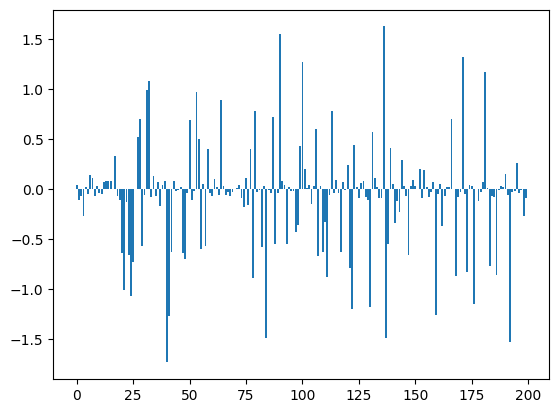

In [58]:
plt.bar(np.arange(0,200,1),vec)
# plt.grid()
plt.show()